<a href="https://colab.research.google.com/github/Amirhatamian/ML-/blob/main/05_introKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Keras

In this notebook we will introduce the main features of Keras ([https://keras.io/](https://keras.io/)).

Keras is an open-source software library that provides a Python interface for Deep Learning. It acts as an high level interface for the TensorFlow framework.

Originally developed as a front-end API supporting multiple backends, including TensorFlow, Microsoft CNTK, Theano, and PlaidML. As of version 2.4, only TensorFlow is supported.

It is designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

In the following we will build three simple applications, solving basic problems in Deep Learning such as regression, binary classification and multiclass categorization.


## Regression

We will build a toy example of a regression problem that will allow us to create and train the first neural network.

Let's first generate some data. We will first sample uniformly 1000 points from -10 to 10. We will consider a simple quadratic function $f(x)=x^2$ and we will add a gaussian noise to the output.



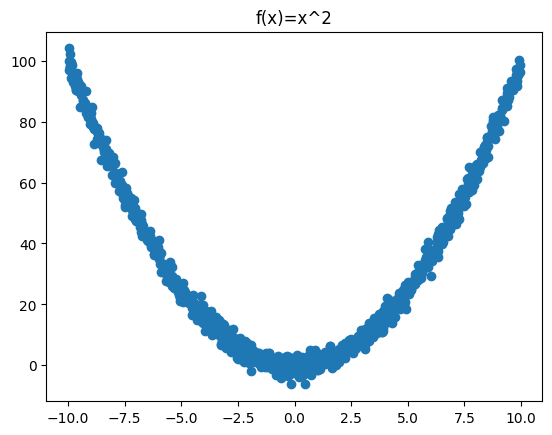

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x = np.random.uniform(-10,10,1000)
y = x**2
y = y + 2*np.random.randn(1000)

plt.scatter(x,y)
plt.title('f(x)=x^2')
plt.show()


Let's now generate a first neural network to fit the function $f(x)$.

We will use a simple feedforward network with one fully connected hidden layer and *ReLU* activation function.

We will first initialize the model as a sequential NN, then stack layers one after another up to the output layer which will be a single node with *linear* activation.

Then we will need to compile the model specifying the loss and the optimizer to be used in the training phase.

Finally, we will run the training (with the method *fit*) for 500 epochs with batch size of 20 samples.


Epoch 1/100
90/90 [==============================] - 1s 4ms/step - loss: 1908.9917 - mse: 1908.9917 - val_loss: 1752.1631 - val_mse: 1752.1631
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 1703.4911 - mse: 1703.4911 - val_loss: 1564.4602 - val_mse: 1564.4602
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 1504.0330 - mse: 1504.0330 - val_loss: 1364.4207 - val_mse: 1364.4207
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 1285.2432 - mse: 1285.2432 - val_loss: 1153.8901 - val_mse: 1153.8901
Epoch 5/100
90/90 [==============================] - 0s 4ms/step - loss: 1057.2407 - mse: 1057.2407 - val_loss: 938.7453 - val_mse: 938.7453
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 835.1227 - mse: 835.1227 - val_loss: 743.9917 - val_mse: 743.9917
Epoch 7/100
90/90 [==============================] - 0s 3ms/step - loss: 638.7633 - mse: 638.7633 - val_loss: 570.3445 - val_mse: 570.3445
Epoch 8/1

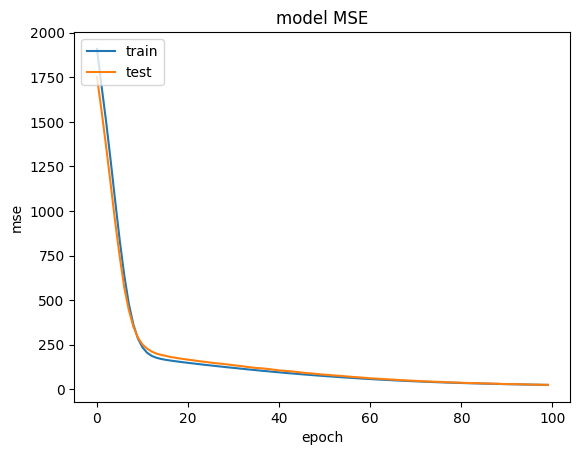

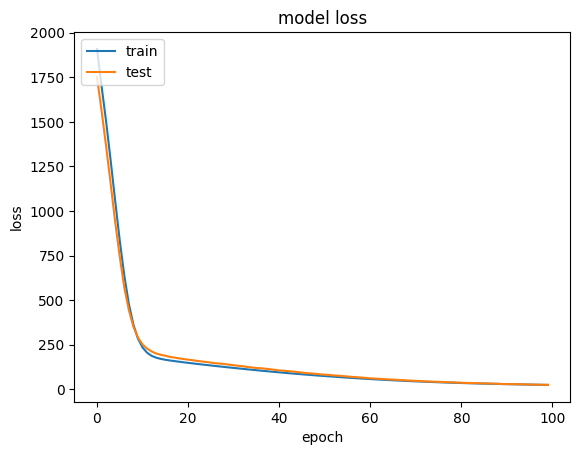

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(
    [
        Dense( 20, activation='relu', input_dim=1),
        Dense( 1, activation='linear')
    ]
)
model.compile( optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit( x, y, batch_size=10, epochs=100, validation_split=0.1)

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# model.save('mymodel.json')
# model.save_weights('myweights.h5')

Now try to:

* change the number of epochs and batch size
* change the number of neurons in the hidden layer and the activation function
* add new hidden layers
* modify the function $f(x)$ with a more complex polynomial function
* ...


## Binary classification

We will use the Pima Indian Diabetes dataset for predicting whether a person has the disease or not.
The first 8 columns are features, the last one is the label.

Define a simple fully connected network with 3 layers with 12, 8 and one node respectively. Use *ReLU* activation function in the hidden layers and *sigmoid* in the last one. Use *binary_crossentropy* as loss function and *accuracy* as metric.



Epoch 1/5
139/139 [==============================] - 2s 4ms/step - loss: 10.6840 - accuracy: 0.5745 - val_loss: 5.6032 - val_accuracy: 0.5455
Epoch 2/5
139/139 [==============================] - 0s 2ms/step - loss: 3.3439 - accuracy: 0.6252 - val_loss: 4.1241 - val_accuracy: 0.4805
Epoch 3/5
139/139 [==============================] - 0s 3ms/step - loss: 2.4084 - accuracy: 0.6368 - val_loss: 3.9134 - val_accuracy: 0.5584
Epoch 4/5
139/139 [==============================] - 0s 3ms/step - loss: 1.9577 - accuracy: 0.6570 - val_loss: 3.1118 - val_accuracy: 0.5844
Epoch 5/5
139/139 [==============================] - 0s 3ms/step - loss: 1.7008 - accuracy: 0.6397 - val_loss: 2.3435 - val_accuracy: 0.5195
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


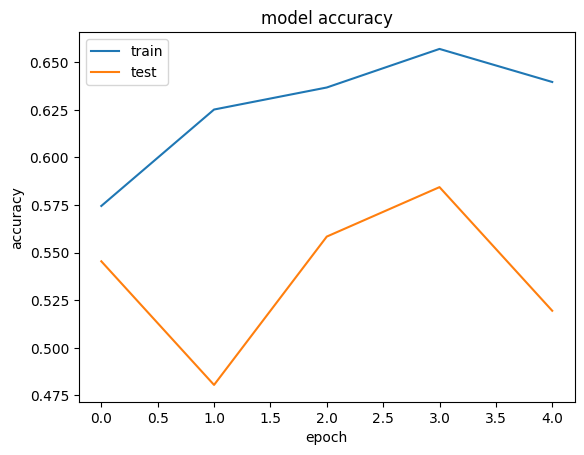

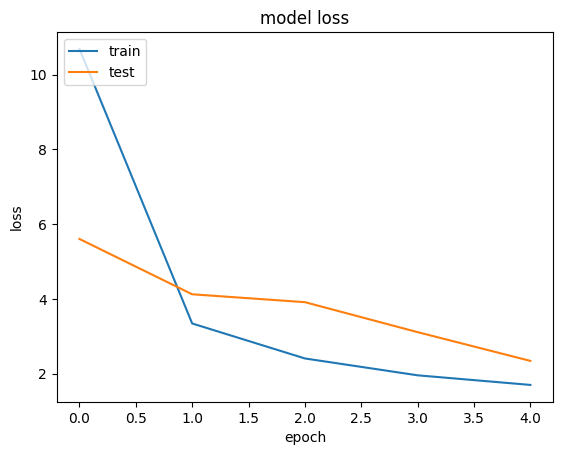

24/24 [==============================] - 0s 2ms/step - loss: 1.5068 - accuracy: 0.6393
Accuracy: 63.93


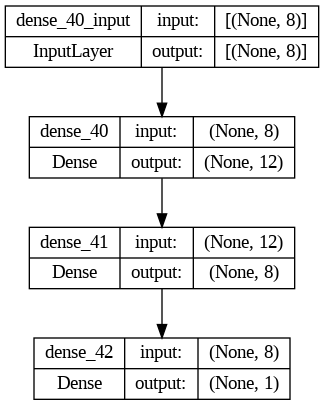

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

# load the dataset
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# define the keras model
model = Sequential()

model= Sequential(
    [
        Dense( 12, input_dim=8, activation='relu'),
        Dense( 8, activation='relu'),
        Dense( 1, activation='sigmoid')
    ]
)

model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit( X, y, batch_size=5, epochs=5, validation_split=0.1)

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

keras.utils.plot_model( model, show_shapes=True)

## Multiclass categorization

We will use the MNIST dataset for image classification among 10 classes.

We will use a simple fully connected network with 5 layers with 256, 128, 64, 32 and 10 nodes respectively. Use categorical_crossentropy as loss function.

Try using dropout on few layers to avoid overfitting.

HINT: you may need to normalize and reshape the input in vectors instead of matrices.

In [ ]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = (train_images / 255) - 0.5
train_images = train_images.reshape((-1,784))
test_images = (test_images / 255) - 0.5
test_images = test_images.reshape((-1,784))

print(train_images.shape)
print(test_images.shape)

model = Sequential(
    [
        Dense( 256, activation='relu', input_shape=(784,)),
        Dense( 128, activation='relu'),
        Dropout(0.5),
    ]
)

model.compile()

model.fit( train_images, to_categorical(train_labels), )

model.evaluate(test_images, to_categorical(test_labels))

keras.utils.plot_model (model, show_shapes=True)

(60000, 784)
(10000, 784)
